In [1]:
import numpy as np
from keras.datasets import mnist

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1' 
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))

import sys  
sys.path.append('../')
from util.util import *
from util import importNotebook
from module.autoencoder import VAE, ConvVAE

Using TensorFlow backend.


importing Jupyter notebook from ../module/autoencoder.ipynb


# Example of VAE

In [ ]:
# Load dataset
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.
numTrain = len(xTrain)
numTest = len(xTest)
sizeDigit = xTrain.shape[1:]
dimInput = np.prod(xTrain.shape[1:]) # dimInput is width*height
xTrain = xTrain.reshape((numTrain, dimInput))
xTest = xTest.reshape((numTest, dimInput))
print(xTrain.shape)
print(xTest.shape)

# Set parameters
numEpochs = 10
sizeBatch = 128
sizeKernel = 3
layerDense = [16, 2]
layerConv = [4, 16]
ratRecon = 1
nameOptim = 'adam'
pathTempBest = '../model/temp'
pathModel = '../model/example/VAE'
patience = 3

# Initialize and train
vae = VAE(dimInput, layerDense=layerDense, ratRecon=ratRecon)
history, timeTrain = vae.fit(xTrain, xTest, 
                             numEpochs=numEpochs,
                             sizeBatch=sizeBatch,
                             nameOptim=nameOptim,
                             pathTempBest=pathTempBest)

# Get the encoder and decoder from the trained model directly
encoder = vae.encoder
decoder = vae.decoder
autoencoder = vae.autoencoder
encoder.summary()
decoder.summary()
autoencoder.summary()

# Save the trained model and load from the path to resume as encoder, decoder, and autoencoder
vae.save(pathModel)
encoder, decoder, autoencoder = VAE.load(pathModel)
encoder.summary()
decoder.summary()
autoencoder.summary()

# Encode testing dataset and get generated reconstruction
encode = encoder.predict(xTest)
generate = decoder.predict(np.array([[0, 0]]))
plt.imshow(generate.reshape(sizeDigit))

# Example of Convolutional VAE

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.3562 - val_loss: 0.2574

Epoch 00001: val_loss improved from inf to 0.25742, saving model to ../model/temp/AutoEncoder1536571363.6614892.hdf5
Epoch 2/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.2372 - val_loss: 0.2223

Epoch 00002: val_loss improved from 0.25742 to 0.22232, saving model to ../model/temp/AutoEncoder1536571363.6614892.hdf5
Epoch 3/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.2285 - val_loss: 0.2158

Epoch 00003: val_loss improved from 0.22232 to 0.21585, saving model to ../model/temp/AutoEncoder1536571363.6614892.hdf5
Epoch 4/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.2254 - val_loss: 0.2137

Epoch 00004: val_loss improved from 0.21585 to 0.21370, saving model to ../model/temp/AutoEncoder1536571363.6614892.hdf5
Epo

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 4)    40          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 14, 14, 4)    16          conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 14, 14, 4)    0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

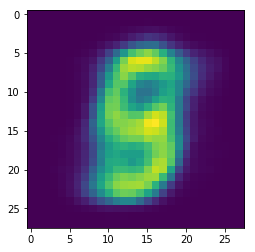

In [2]:
# Load dataset
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.
numTrain = len(xTrain)
numTest = len(xTest)
sizeDigit = xTrain.shape[1:]
dimInput = [*sizeDigit, 1] # dimInput is (width, height, channels)
xTrain = xTrain.reshape((numTrain, *dimInput))
xTest = xTest.reshape((numTest, *dimInput))
print(xTrain.shape)
print(xTest.shape)

# Set parameters
numEpochs = 10
sizeBatch = 128
sizeKernel = 3
layerDense = [16, 2]
layerConv = [4, 16]
ratRecon = 1
nameOptim = 'adam'
pathTempBest = '../model/temp'
pathModel = '../model/example/ConVAE'
patience = 3

# Initialize and train
convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv=layerConv, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 pathTempBest=pathTempBest)

# Get the encoder and decoder from the trained model directly
encoder = convVAE.encoder
decoder = convVAE.decoder
autoencoder = convVAE.autoencoder
encoder.summary()
decoder.summary()
autoencoder.summary()

# Save the trained model and load from the path to resume as encoder, decoder, and autoencoder
convVAE.save(pathModel)
encoder, decoder, autoencoder = ConvVAE.load(pathModel)
encoder.summary()
decoder.summary()
autoencoder.summary()

# Encode testing dataset and get generated reconstruction
encode = encoder.predict(xTest)
generate = decoder.predict(np.array([[0, 0]]))
plt.imshow(generate.reshape(sizeDigit))